In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import spectral
# Specify the path to the ENVI data file and the file with .hdr
file = '/mnt/c/data/chikusei_ENVI/HyperspecVNIR_Chikusei_20140729.bsq'
header_file = '/mnt/c/data/chikusei_ENVI/HyperspecVNIR_Chikusei_20140729.hdr'

# Open the ENVI image using rasterio
with rasterio.open(file) as src:
    # Read the hyperspectral data into a NumPy array
    print("Reading HS data")
    hyperspectral_data = src.read()

    # Display information about the hyperspectral data
    print('Shape of hyperspectral data:', hyperspectral_data.shape)
    print('Number of bands:', src.count)




Reading HS data
Shape of hyperspectral data: (128, 2517, 2335)
Number of bands: 128


In [2]:
#Open the image with spectral
header_spectral = spectral.open_image(header_file)

# Access the wavelengths associated with each band
wavelengths = header_spectral.bands.centers

# Display information about the hyperspectral data and wavelengths
print('Shape of hyperspectral data:', header_spectral.shape)
print('Number of bands:', header_spectral.shape[2])
print('Wavelengths:', wavelengths)

[attr for attr in dir(header_spectral) if "__" not in attr]

Shape of hyperspectral data: (2517, 2335, 128)
Number of bands: 128
Wavelengths: [0.36259, 0.36775, 0.3729, 0.37807, 0.38323, 0.38839, 0.39355, 0.39871, 0.40387, 0.40903, 0.41419, 0.41936, 0.42452, 0.42968, 0.43484, 0.44, 0.44516, 0.45032, 0.45548, 0.46064, 0.4658, 0.47096, 0.47612, 0.48129, 0.48645, 0.49161, 0.49677, 0.50193, 0.50709, 0.51225, 0.51741, 0.52257, 0.52773, 0.53289, 0.53806, 0.54321, 0.54838, 0.55354, 0.5587, 0.56386, 0.56902, 0.57418, 0.57934, 0.5845, 0.58966, 0.59483, 0.59999, 0.60514, 0.61031, 0.61547, 0.62063, 0.62579, 0.63095, 0.63611, 0.64127, 0.64643, 0.65159, 0.65675, 0.66192, 0.66707, 0.67224, 0.6774, 0.68256, 0.68772, 0.69288, 0.69804, 0.7032, 0.70836, 0.71352, 0.71868, 0.72385, 0.72901, 0.73417, 0.73933, 0.74449, 0.74965, 0.75481, 0.75997, 0.76513, 0.77029, 0.77545, 0.78061, 0.78578, 0.79094, 0.7961, 0.80126, 0.80642, 0.81158, 0.81674, 0.8219, 0.82706, 0.83223, 0.83738, 0.84254, 0.84771, 0.85287, 0.85803, 0.86319, 0.86835, 0.87351, 0.87867, 0.88383, 0.88899, 0.

['_disable_memmap',
 '_fix_negative_indices',
 '_memmap',
 '_open_memmap',
 'asarray',
 'bands',
 'byte_order',
 'dtype',
 'fid',
 'filename',
 'interleave',
 'load',
 'metadata',
 'nbands',
 'ncols',
 'nrows',
 'offset',
 'open_memmap',
 'params',
 'read_band',
 'read_bands',
 'read_datum',
 'read_pixel',
 'read_subimage',
 'read_subregion',
 'sample_size',
 'scale_factor',
 'set_params',
 'shape',
 'swap',
 'transform',
 'using_memmap']

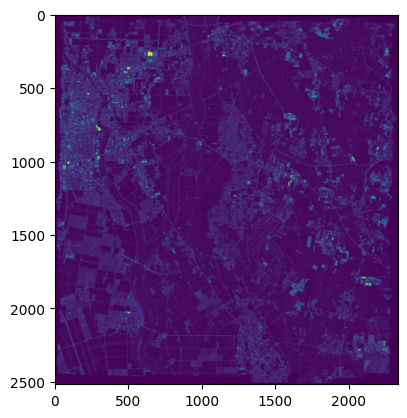

In [3]:
#Let's show specific wavelengths
ind = wavelengths.index(0.46064)
plt.imshow(hyperspectral_data[ind,:,:])
plt.show()

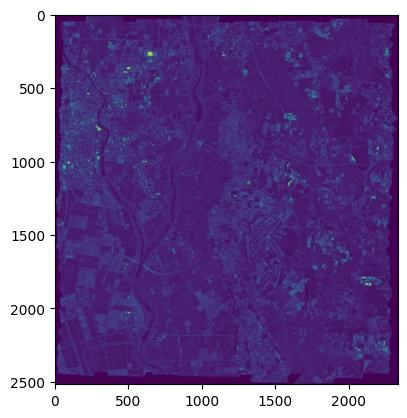

In [4]:
ind = wavelengths.index(0.56386)
plt.imshow(hyperspectral_data[ind,:,:])
plt.show()


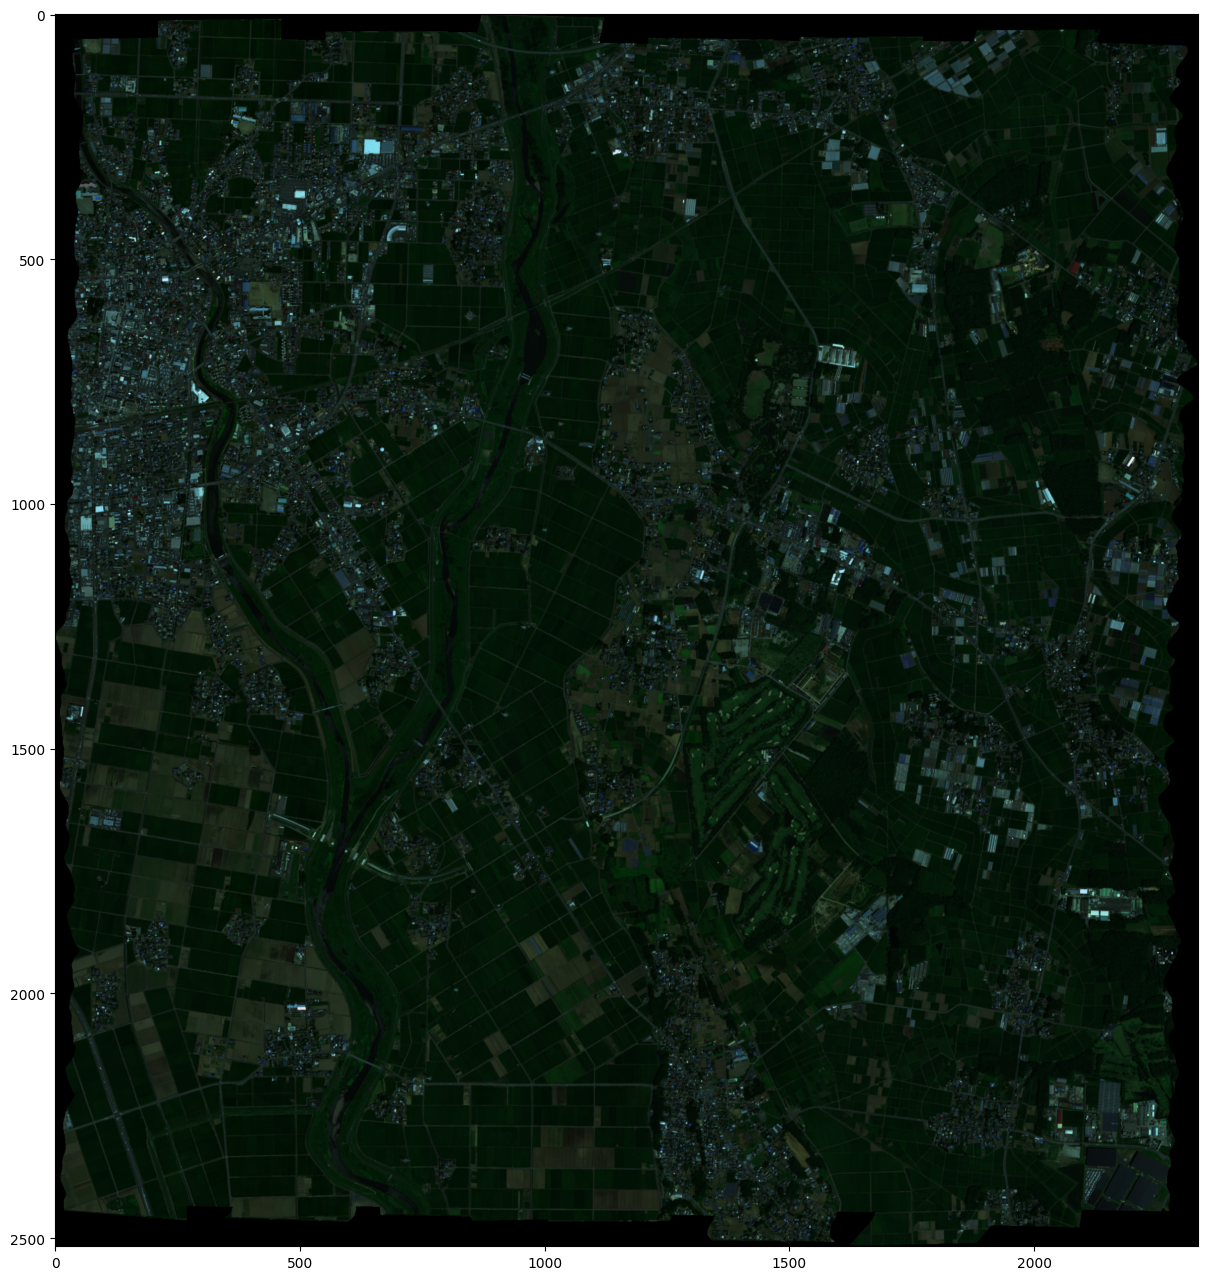

In [5]:

#Let's combine a short, middle and long wavelength
img = np.zeros([header_spectral.shape[0], header_spectral.shape[1], 3], np.float32)

ind1 = wavelengths.index(0.46064)
ind2 = wavelengths.index(0.56386)
ind3 = wavelengths.index(0.67224)
min1 = np.min(hyperspectral_data[ind1,:,:])
min2 = np.min(hyperspectral_data[ind2,:,:])
min3 = np.min(hyperspectral_data[ind3,:,:])
max1 = np.max(hyperspectral_data[ind1,:,:])
max2 = np.max(hyperspectral_data[ind2,:,:])
max3 = np.max(hyperspectral_data[ind3,:,:])

img[:,:,2] = (hyperspectral_data[ind1,:,:]-min1)/(max1 - min1)
img[:,:,1] = (hyperspectral_data[ind2,:,:]-min2)/(max2 - min2)
img[:,:,0] = (hyperspectral_data[ind3,:,:]-min3)/(max3 - min3)
plt.figure(figsize=(16,16))
plt.imshow(img)
plt.show()

## Spectrum vizualisation

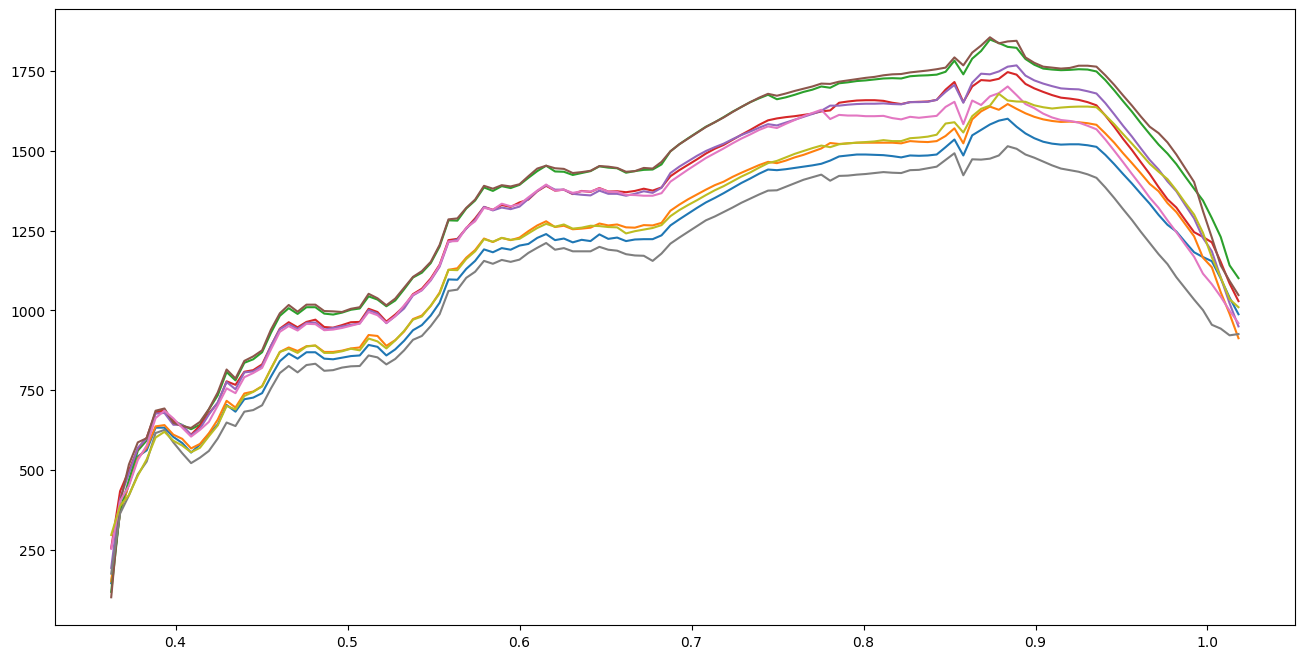

In [177]:
# Plot of 9 spectrums around the same pixels
target_x = 200
target_y = 500

plt.figure(figsize=(16,8))
for i in range (3):
    for j in range(3):
        plt.plot(header_spectral.bands.centers, hyperspectral_data[:,target_x-1+i,target_y-1+j])
plt.show()

## Hand-made RSR

In [16]:
def gaussian_response(x, mean, sigma):
    norm = 1/(sigma*np.sqrt(2*np.pi))
    return norm*np.exp(-0.5*((x-mean)/sigma)**2)

In [56]:
w_vector = np.array(header_spectral.bands.centers)
#  490 nm for blue, 560 nm for green, 665 nm for red, and 840 nm for near-infrared
sigma = 0.05
blue_rsr = gaussian_response(w_vector,0.49,sigma)
green_rsr = gaussian_response(w_vector,0.56,sigma)
red_rsr = gaussian_response(w_vector,0.665,sigma)
nir_rsr = gaussian_response(w_vector,0.89,sigma)
blue_rsr /= np.max(blue_rsr)
green_rsr /= np.max(green_rsr)
red_rsr /= np.max(red_rsr)
nir_rsr /= np.max(nir_rsr)

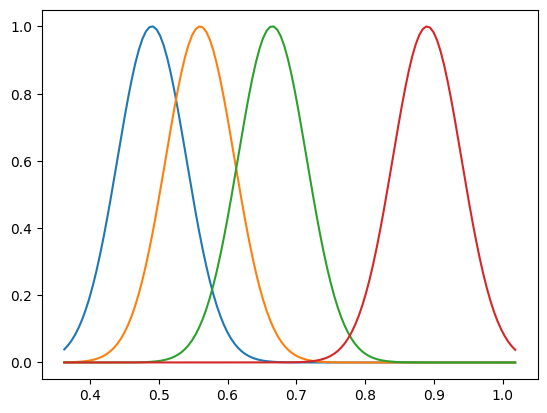

In [57]:
plt.plot(w_vector,blue_rsr)
plt.plot(w_vector,green_rsr)
plt.plot(w_vector,red_rsr)
plt.plot(w_vector,nir_rsr)

In [59]:
convolved_spectrum_blue = hyperspectral_data[:,target_x,target_y]*blue_rsr
convolved_spectrum_green = hyperspectral_data[:,target_x,target_y]*green_rsr
convolved_spectrum_red = hyperspectral_data[:,target_x,target_y]*red_rsr
convolved_spectrum_nir = hyperspectral_data[:,target_x,target_y]*nir_rsr

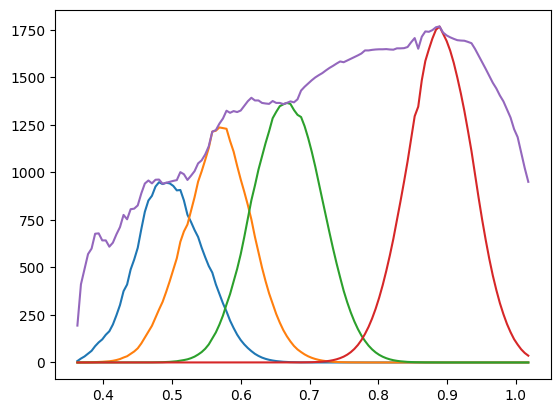

In [90]:
plt.plot(w_vector,convolved_spectrum_blue)
plt.plot(w_vector,convolved_spectrum_green)
plt.plot(w_vector,convolved_spectrum_red)
plt.plot(w_vector,convolved_spectrum_nir)
plt.plot(header_spectral.bands.centers, hyperspectral_data[:,target_x,target_y])

In [152]:
hyperspectral_data.shape

(128, 2517, 2335)

In [143]:
np.max(convolved_spectrum_blue)

np.float64(948.0052599079211)

In [166]:
# Extract only a few values from the HS image spectrum
def make_ms(spectrum,w,mean,sigma):
    ms = np.empty((len(mean),spectrum.shape[1], spectrum.shape[2]))
    for i,m in enumerate(mean):
        filter = gaussian_response(w,m,sigma)
        filter /= np.max(filter)
        ms[i,:,:] = np.max(spectrum*filter.reshape(len(filter),1,1),axis=0)
        #ms[i,:,:] /= np.max(ms[i,:,:])
    return ms

ms_image = make_ms(hyperspectral_data,w_vector,[0.49,0.56,0.665,0.89],0.05)
ms_image.shape


(4, 2517, 2335)

In [147]:
ms_image[:,target_x, target_y]

array([ 948.00525991, 1236.14539801, 1365.        , 1767.        ])

In [185]:
# Normalize image
def normalize_ms(ms_image):
    normalized_image = np.empty(ms_image.shape, dtype=ms_image.dtype)
    for i in range(ms_image.shape[0]):
        curr_min = np.min(ms_image[i,:,:])
        curr_max = np.max(ms_image[i,:,:])
        print(curr_min,curr_max)
        r = curr_max - curr_min
        normalized_image[i,:,:] = (ms_image[i,:,:]-curr_min)/r
    return normalized_image

normalized_image = normalize_ms(ms_image)
np.max(normalized_image)


0.0 5314.349589044908
0.0 5901.216406415574
0.0 10420.584423613549
0.0 14577.582434760061


np.float64(1.0)

In [188]:
print(ms_image.shape)
ms_image[:,target_x,target_y]

(4, 2517, 2335)


array([ 948.00525991, 1236.14539801, 1365.        , 1767.        ])

In [189]:
# Make image for visualization
def make_image(input_ms: np.array,indices: list) -> np.array:
    img = np.zeros([input_ms.shape[1], input_ms.shape[2], 3], np.float32)
    for i in range(3):
        channel_min = np.min(input_ms[indices[i],:,:])    
        channel_max = np.max(input_ms[indices[i],:,:])
        print(channel_max, channel_min)
        img[:,:,i] = (input_ms[indices[i],:,:] - channel_min)/(channel_max - channel_min)
    return img

image_to_plot = make_image(ms_image,[0,1,2])
image_to_plot.shape

5314.349589044908 0.0
5901.216406415574 0.0
10420.584423613549 0.0


(2517, 2335, 3)

5314.349589044908 0.0
5901.216406415574 0.0
10420.584423613549 0.0


(2517, 2335, 3)

np.float32(1.0)

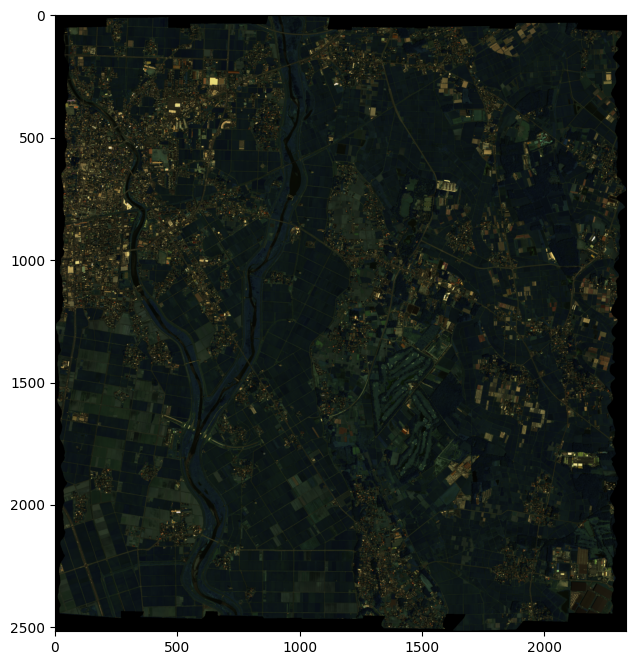

In [176]:
plt.figure(figsize=(8,8))
plt.imshow(image_to_plot, vmin=0, vmax=image_to_plot.max())
np.max(image_to_plot)

## RSR from pyspectral

In [111]:
from pyspectral.rsr_reader import RelativeSpectralResponse
from pyspectral.utils import debug_on
olci = RelativeSpectralResponse('Sentinel-3A', 'olci')



No rsr file /root/.local/share/pyspectral/rsr_olci_Sentinel-3A.h5 on disk
6kB [00:00, 1937.92kB/s]             


In [119]:
print([attr for attr in dir(olci.rsr) if '__' not in attr])
[str(b) for b in olci.band_names]

['clear', 'copy', 'fromkeys', 'get', 'instrument', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


['Oa01',
 'Oa02',
 'Oa03',
 'Oa04',
 'Oa05',
 'Oa06',
 'Oa07',
 'Oa08',
 'Oa09',
 'Oa10',
 'Oa11',
 'Oa12',
 'Oa13',
 'Oa14',
 'Oa15',
 'Oa16',
 'Oa17',
 'Oa18',
 'Oa19',
 'Oa20',
 'Oa21']

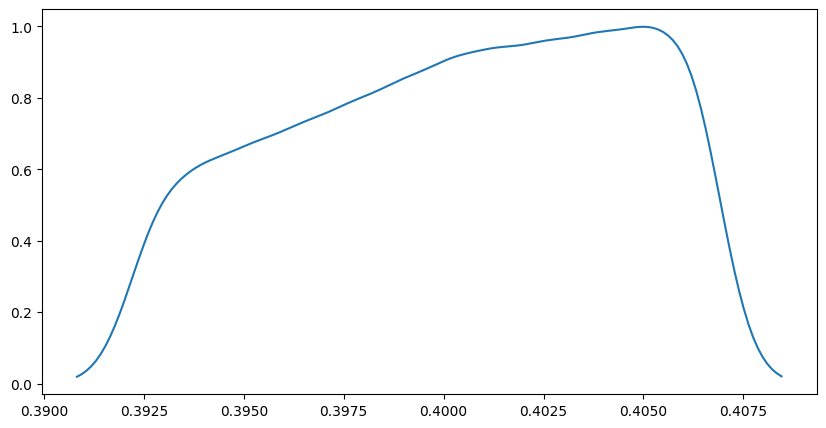

In [120]:
rsr = olci.rsr['Oa01']['det-1']['response']
resp = np.where(rsr < 0.015, np.nan, rsr)
wl_ = olci.rsr['Oa01']['det-1']['wavelength']
wvl = np.where(np.isnan(resp), np.nan, wl_)
dummy = plt.figure(figsize=(10,5))
dummy = plt.plot(wvl, resp)